<a href="https://colab.research.google.com/github/luorix1/ML_DL-self_study/blob/main/simple_rnn_IMDB_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.imdb.load_data(num_words=500)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2)

In [4]:
# keras.preprocessing.sequence.pad_sequences(input, maxlen)
# assumes important data is at the back

In [5]:
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [6]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
# one-hot encoding
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
print(train_oh.shape)

(20000, 100, 500)


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 49ms/step - loss: 0.6918 - accuracy: 0.5188 - val_loss: 0.6928 - val_accuracy: 0.5156
Epoch 2/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6906 - accuracy: 0.5275 - val_loss: 0.6922 - val_accuracy: 0.5170
Epoch 3/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6894 - accuracy: 0.5352 - val_loss: 0.6919 - val_accuracy: 0.5186
Epoch 4/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6882 - accuracy: 0.5382 - val_loss: 0.6912 - val_accuracy: 0.5234
Epoch 5/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6870 - accuracy: 0.5445 - val_loss: 0.6908 - val_accuracy: 0.5244
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6858 - accuracy: 0.5473 - val_loss: 0.6904 - val_accuracy: 0.5200
Epoch 7/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6845 - accuracy: 0.5542 - val_loss: 0.6901 - val_ac

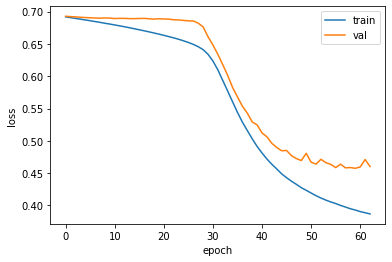

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 4000000000


In [24]:
# word embedding
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 23ms/step - loss: 0.6979 - accuracy: 0.4991 - val_loss: 0.6955 - val_accuracy: 0.5058
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6928 - accuracy: 0.5177 - val_loss: 0.6933 - val_accuracy: 0.5166
Epoch 3/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6888 - accuracy: 0.5357 - val_loss: 0.6916 - val_accuracy: 0.5250
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6851 - accuracy: 0.5507 - val_loss: 0.6903 - val_accuracy: 0.5350
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6813 - accuracy: 0.5638 - val_loss: 0.6893 - val_accuracy: 0.5318
Epoch 6/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6773 - accuracy: 0.5748 - val_loss: 0.6885 - val_accuracy: 0.5364
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6730 - accuracy: 0.5863 - val_loss: 0.6879 - val_accuracy:

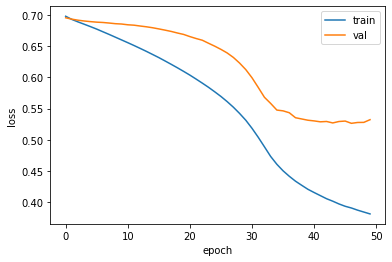

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()